In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lats_lngs = zip(lats,lngs)

In [3]:
coordinates = list(lats_lngs)

In [4]:
# Create a list to append the cities to
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
print(len(cities))

608


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'units':'Imperial',
    'appid':weather_api_key,
    'q':'san jose'
}

In [6]:
city_weather = requests.get(url,params)
city_weather

<Response [200]>

In [7]:
#params['q'] = 'Bston'
#city_weather = requests.get(url,params)
#city_weather

In [8]:
city_weather.json()

{'coord': {'lon': -121.895, 'lat': 37.3394},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 49.42,
  'feels_like': 49.42,
  'temp_min': 43,
  'temp_max': 51.01,
  'pressure': 1017,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 0.74, 'deg': 6, 'gust': 1.9},
 'clouds': {'all': 90},
 'dt': 1617720686,
 'sys': {'type': 1,
  'id': 5845,
  'country': 'US',
  'sunrise': 1617716700,
  'sunset': 1617762859},
 'timezone': -25200,
 'id': 5392171,
 'name': 'San Jose',
 'cod': 200}

In [9]:
boston_data = city_weather.json()

In [10]:
boston_country = boston_data['sys']['country']
date_time = boston_data['dt']
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat, lng, max_temp, humidity, clouds, wind)

37.3394 -121.895 51.01 76 90 0.74


In [11]:
from datetime import datetime
datetime.utcfromtimestamp(date_time).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-06 14:51:26'

In [12]:
# empty listy to hold data for the cities
city_data = []

# begin statement
print("Beginning Data Retrieval     ")
print("-----------------------------")

# init counters
record_count = 1
set_count = 1
# Loop through cities
for i, city in enumerate(cities):
    
    # group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #set up parameter dictionary to create correct endpoint
    params['q'] = city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(url,params).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert datetime to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # skip if we get an error
    except:
        print("City not found.Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | montelibano
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kuvshinovo
Processing Record 5 of Set 1 | bandarbeyla
Processing Record 6 of Set 1 | maniitsoq
Processing Record 7 of Set 1 | saint-augustin
Processing Record 8 of Set 1 | miri
Processing Record 9 of Set 1 | saleaula
City not found.Skipping...
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | semnan
Processing Record 12 of Set 1 | baiyin
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | eyl
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | santa rosa
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | olbia
Processing Record 23 of Set 1

Processing Record 36 of Set 4 | beira
Processing Record 37 of Set 4 | adrar
Processing Record 38 of Set 4 | meadow lake
Processing Record 39 of Set 4 | dunedin
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | matagami
Processing Record 43 of Set 4 | igarka
Processing Record 44 of Set 4 | pangnirtung
Processing Record 45 of Set 4 | mumford
Processing Record 46 of Set 4 | honningsvag
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | kavaratti
Processing Record 50 of Set 4 | caravelas
Processing Record 1 of Set 5 | srednekolymsk
Processing Record 2 of Set 5 | samusu
City not found.Skipping...
Processing Record 3 of Set 5 | santa barbara
Processing Record 4 of Set 5 | nyurba
Processing Record 5 of Set 5 | coahuayana
Processing Record 6 of Set 5 | mentok
City not found.Skipping...
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | mpoph

Processing Record 25 of Set 8 | kumbo
Processing Record 26 of Set 8 | taltal
Processing Record 27 of Set 8 | aksu
Processing Record 28 of Set 8 | kamenka
Processing Record 29 of Set 8 | diffa
Processing Record 30 of Set 8 | kazalinsk
City not found.Skipping...
Processing Record 31 of Set 8 | praia da vitoria
Processing Record 32 of Set 8 | itarema
Processing Record 33 of Set 8 | rehoboth
Processing Record 34 of Set 8 | mont-dore
Processing Record 35 of Set 8 | vysokogornyy
Processing Record 36 of Set 8 | mazatlan
Processing Record 37 of Set 8 | alvorada
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | campbell river
Processing Record 41 of Set 8 | colac
Processing Record 42 of Set 8 | bayangol
Processing Record 43 of Set 8 | moyale
Processing Record 44 of Set 8 | andover
Processing Record 45 of Set 8 | filingue
Processing Record 46 of Set 8 | milkovo
Processing Record 47 of Set 8 | bredasdorp
Processing Record 48 o

Processing Record 14 of Set 12 | bayanday
Processing Record 15 of Set 12 | dessalines
Processing Record 16 of Set 12 | chumikan
Processing Record 17 of Set 12 | russell
Processing Record 18 of Set 12 | togur
Processing Record 19 of Set 12 | sangar
Processing Record 20 of Set 12 | pleasant point
Processing Record 21 of Set 12 | kenai
Processing Record 22 of Set 12 | vostok
Processing Record 23 of Set 12 | erenhot
Processing Record 24 of Set 12 | kimbe
Processing Record 25 of Set 12 | tawkar
City not found.Skipping...
Processing Record 26 of Set 12 | letterkenny
Processing Record 27 of Set 12 | dokka
Processing Record 28 of Set 12 | half moon bay
Processing Record 29 of Set 12 | behshahr
Processing Record 30 of Set 12 | tual
Processing Record 31 of Set 12 | zhigansk
Processing Record 32 of Set 12 | gardan diwal
City not found.Skipping...
Processing Record 33 of Set 12 | vanimo
Processing Record 34 of Set 12 | tres arroyos
Processing Record 35 of Set 12 | harbour breton
Processing Record 

In [13]:
len(city_data)

553

In [14]:
city_data_df = pd.DataFrame(city_data)

In [15]:
column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[column_order]

In [16]:
out_path = "weather_data/cities.csv"
city_data_df.to_csv(out_path,index_label="City_ID")

In [17]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
cloudiness = city_data_df["Cloudiness"]
humidity = city_data_df["Humidity"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
import time 
today = time.time()
today

1617721058.3422756

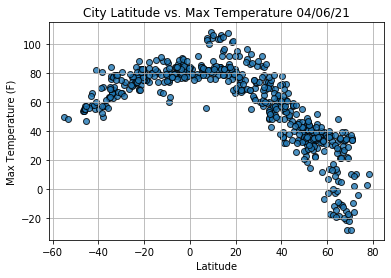

In [19]:
plt.scatter(lats,max_temps,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show
plt.show()

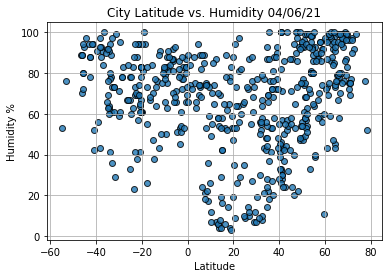

In [20]:
plt.scatter(lats,humidity,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show
plt.show()

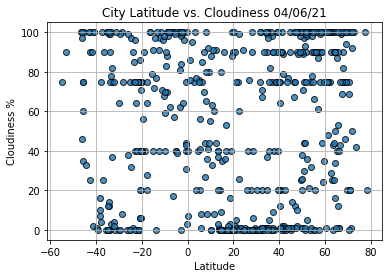

In [21]:
plt.scatter(lats,cloudiness,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show
plt.show()

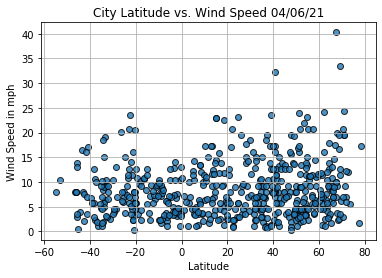

In [22]:
plt.scatter(lats,wind_speed,edgecolor='k',linewidths=1,alpha=0.8,label="Cities",marker='o')
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed in mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show
plt.show()

In [23]:
from scipy.stats import linregress


def plot_linregress(x_vals,y_vals,title,y_label,position:(int,int)):
    # get linear regression params
    m,b,r,p,err = linregress(x_vals,y_vals)
    
    # Calculate the values to plot the line
    lin_vals = [m*x_val+b for x_val in x_vals]
    # String representation of the line
    line_eq = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    # plot the values and the line
    plt.scatter(x_vals,y_vals)
    plt.plot(x_vals,lin_vals,"r")
    # add other features to the chart
    plt.annotate(line_eq, position, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(f"{title}")
    plt.show()
    return m,b,r,p,err

In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

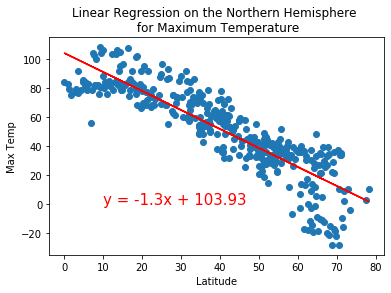

(-1.3045249323641763,
 103.9294444195226,
 -0.8760866299914074,
 7.350430694200367e-121,
 0.037074493438357614)

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linregress(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,0))

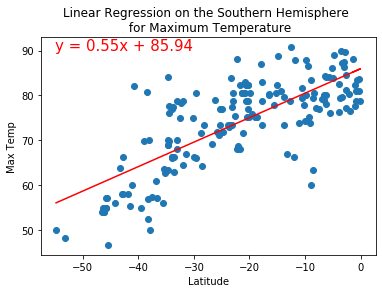

(0.5453170462417736,
 85.94414141071734,
 0.753371897264135,
 1.686227456905064e-33,
 0.03608471963936957)

In [26]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

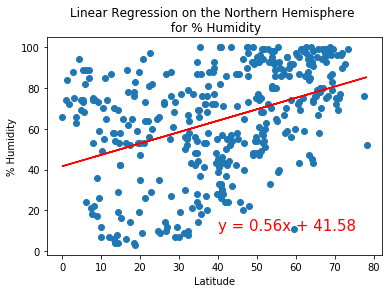

(0.5590377155491832,
 41.57879534258116,
 0.412070383293133,
 6.9305485753711e-17,
 0.06383294981863391)

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

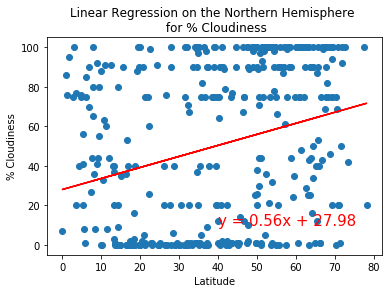

(0.5585141735995952,
 27.98451264303993,
 0.2721386312235322,
 7.958014575540897e-08,
 0.10198115453678852)

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

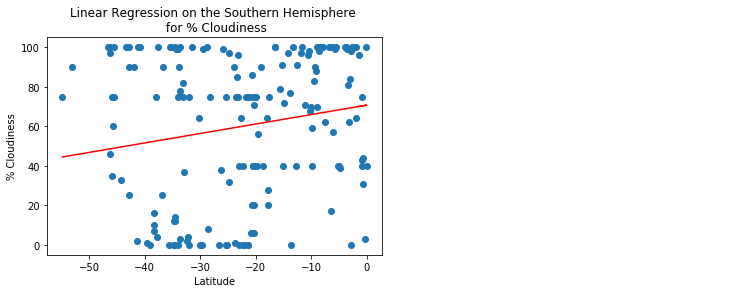

(0.4789019032069286,
 70.72891057787383,
 0.17904392609747025,
 0.01742544324739314,
 0.19949742716230742)

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

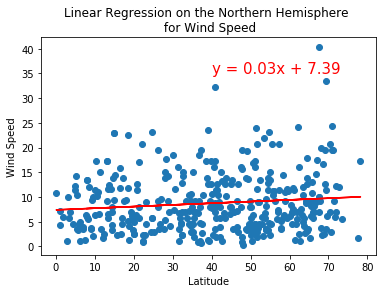

(0.033728331511304645,
 7.387785057521477,
 0.11182604215419983,
 0.029940851852123796,
 0.015477603198499867)

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

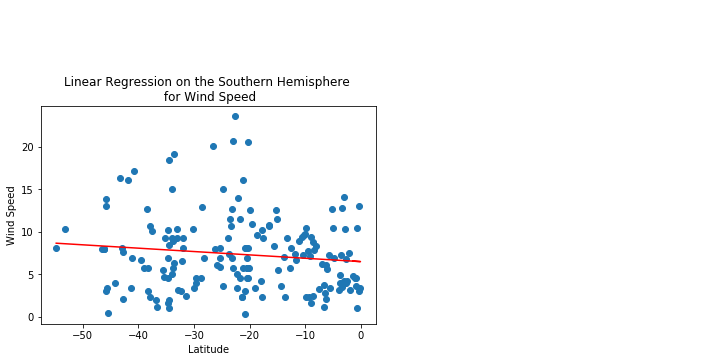

(-0.039397564256132854,
 6.505290160799412,
 -0.12457936513010803,
 0.09948008435191404,
 0.02378767957863942)

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linregress(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))